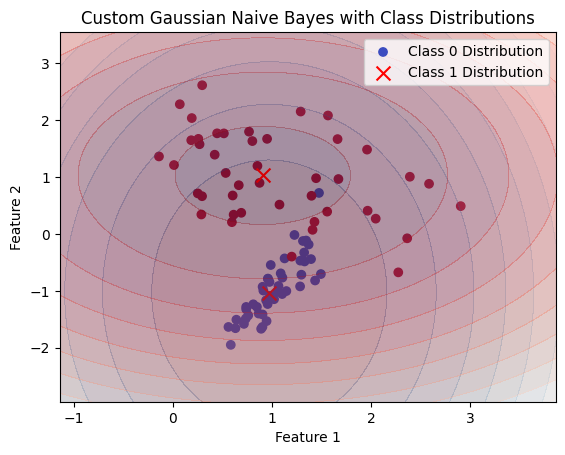

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def gaussian_pdf(x, mean, variance):
    return (1 / np.sqrt(2 * np.pi * variance)) * np.exp(-(x - mean)**2 / (2 * variance))

class GaussianNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.class_priors = np.zeros(len(self.classes))
        self.means = np.zeros((len(self.classes), X.shape[1]))
        self.variances = np.zeros((len(self.classes), X.shape[1]))

        for i, c in enumerate(self.classes):
            class_data = X[y == c]
            self.class_priors[i] = len(class_data) / len(X)
            self.means[i] = np.mean(class_data, axis=0)
            self.variances[i] = np.var(class_data, axis=0)

    def predict(self, X):
        predictions = []

        for x in X:
            class_probs = []

            for i, c in enumerate(self.classes):
                prior = np.log(self.class_priors[i])
                likelihood = np.sum(np.log(gaussian_pdf(x, self.means[i], self.variances[i])))
                class_probs.append(prior + likelihood)

            predictions.append(self.classes[np.argmax(class_probs)])

        return np.array(predictions)

    def plot_distribution(self, X, y):
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, marker='o', label='Data Points')

        for i, c in enumerate(self.classes):
            plt.scatter(self.means[i, 0], self.means[i, 1], c='red', marker='x', s=100, label=f'Mean (Class {c})')

            x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
            y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
            Z = np.log(gaussian_pdf(np.c_[xx.ravel(), yy.ravel()], self.means[i], self.variances[i]).prod(axis=1))
            Z = Z.reshape(xx.shape)

            plt.contourf(xx, yy, Z, levels=10, cmap=plt.cm.Blues if i == 0 else plt.cm.Reds, alpha=0.3)

        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Custom Gaussian Naive Bayes with Class Distributions')

        # Create a legend manually
        legend_labels = [f'Class {c} Distribution' for c in self.classes]
        plt.legend(legend_labels, loc='upper right')

        plt.show()

# Generate synthetic data
np.random.seed(42)
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit Gaussian Naive Bayes model
gnb_custom = GaussianNaiveBayes()
gnb_custom.fit(X_train, y_train)

# Plotting decision boundary and class distributions for custom GNB
gnb_custom.plot_distribution(X_test, y_test)
